In [ ]:
from google.colab import files

# Mengunggah data dari file Excel
uploaded = files.upload()

# Mengambil nama file yang diunggah
file_name = list(uploaded.keys())[0]

In [ ]:
import pandas as pd
# Membaca data dari file Excel
data = pd.read_excel(file_name)

In [ ]:
# Ganti angka 1 dan 2 dengan 'Male' dan 'Female'
data['Jenis Kelamin'] = data['Jenis Kelamin'].replace({1: 0, 2: 1})

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

# Fungsi untuk memprediksi jumlah kalori harian
def predict_calories(regressor_model, user_data):
    prediction = regressor_model.predict(user_data)[0]
    return prediction
#Hitung BMI
def calculate_bmi(berat_badan, tinggi_badan):
    bmi = berat_badan/((tinggi_badan/100)*(tinggi_badan/100))
    return bmi

def classify_bmi(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif 18.5 <= bmi <= 24.99:
        return "Normal"
    elif 25 <= bmi <= 29.99:
        return "Overweight"
    elif 30 <= bmi <= 34.99:
        return "Obesity Level 1"
    elif 35 <= bmi <= 39.99:
        return "Obesity Level 2"
    else:
        return "Obesity Level 3"

# Membagi data menjadi fitur (X) dan target (y) untuk regresi
X_reg = data[['Bul_tinggi', 'Berat Badan', 'Usia', 'Jenis Kelamin']]
y_reg = data['Bilbul']
# Membagi data menjadi data latih dan data uji untuk regresi
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

# Membuat dan melatih model regresi dengan data yang telah diubah sesuai jumlah data train yang hendak digunakan
regressor_model = DecisionTreeRegressor()
regressor_model.fit(X_reg_train, y_reg_train)

# Melakukan prediksi pada data uji
y_reg_pred = regressor_model.predict(X_reg_test)

# Menggunakan hasil prediksi regresi sebagai fitur untuk klasifikasi
X_class_from_reg = pd.DataFrame({'Prediksi_Regresi': y_reg_pred})

# Menambahkan variabel kategori klasifikasi
X_class_from_reg['Kategori Klasifikasi'] = data['Kategori Klasifikasi']

# Membagi data untuk klasifikasi hanya dengan kolom 'Bilbul'
X_class = X_class_from_reg[['Prediksi_Regresi']]
y_class = X_class_from_reg['Kategori Klasifikasi']

# Membagi data menjadi data latih dan data uji untuk klasifikasi
X_class_train, X_class_test, y_class_train, y_class_test = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Membuat dan melatih model klasifikasi
classifier_model = DecisionTreeClassifier()
classifier_model.fit(X_class_train, y_class_train)


# Fungsi untuk memperoleh input dari pengguna
def get_user_input():
    tinggi_badan = float(input("Masukkan tinggi badan Anda (cm): "))
    berat_badan = float(input("Masukkan berat badan Anda (kg): "))
    usia = float(input("Masukkan usia Anda: "))
    jenis_kelamin = int(input("Masukkan jenis kelamin Anda (0 untuk Male, 1 untuk Female): "))
    return tinggi_badan, berat_badan, usia, jenis_kelamin

# Fungsi untuk mengkategorikan jumlah kalori harian
def categorize_calories(classifier_model, user_data):
    # Ambil kolom yang digunakan oleh model klasifikasi
    feature_columns = X_class.columns
    # Sesuaikan urutan dan nama kolom dengan fitur yang digunakan pada saat pelatihan model
    user_data_for_classification = user_data[feature_columns]
    # Prediksi kategori dengan model klasifikasi
    category = classifier_model.predict(user_data_for_classification)[0]
    return category

# Memperoleh input pengguna
user_input_reg = get_user_input()

# Menyiapkan data pengguna untuk prediksi regresi
user_data_reg = pd.DataFrame([user_input_reg], columns=['Bul_tinggi', 'Berat Badan', 'Usia', 'Jenis Kelamin'])

# Prediksi jumlah kalori harian dengan model regresi
calories_prediction_reg = predict_calories(regressor_model, user_data_reg)

# Menambahkan hasil prediksi regresi ke data pengguna
user_data_reg['Prediksi_Regresi'] = calories_prediction_reg

# Menyiapkan data pengguna untuk prediksi klasifikasi
user_data_for_classification = user_data_reg[['Prediksi_Regresi']]

# Kategorisasi jumlah kalori harian dengan model klasifikasi
calories_category = categorize_calories(classifier_model, user_data_for_classification)
calories_category
from sklearn.metrics import accuracy_score

# Melakukan prediksi kategori pada data uji
y_class_pred = classifier_model.predict(X_class_test)
# Mendapatkan nilai BMI dari fungsi calculate_bmi
bmi = calculate_bmi(user_input_reg[1], user_input_reg[0])
# Mendapatkan kategori BMI dari fungsi classify_bmi
bmi_category = classify_bmi(bmi)

# Menampilkan hasil prediksi kalori harian dan rekomendasi menu
print(f"Prediksi Jumlah Kalori Harian Normal: {calories_prediction_reg} kcal")
print(f"Kategori Kebutuhan Kalori: {calories_category}")
print(f"Indeks Massa Tubuh (BMI): {bmi:.2f}")
print(f"Klasifikasi BMI: {bmi_category}")

# Membaca data menu
menu_data = data[['Menu', 'Kategori']]

# Fungsi untuk memberikan rekomendasi menu acak dari kategori
def recommend_random_menu(calories_category, menu_data):
    recommended_menu = menu_data[menu_data['Kategori'] == calories_category]
    if not recommended_menu.empty:
        random_menu = recommended_menu.sample(n=1)
        return random_menu
    else:
        return None
from sklearn.metrics import r2_score

# Menghitung R-squared
r_squared = r2_score(y_reg_test, y_reg_pred)
print(f'Akurasi Prediksi Jumlah Kalori Harian: {r_squared}')

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Melakukan prediksi kategori pada data uji
y_class_pred = classifier_model.predict(X_class_test)

# Menghitung akurasi
accuracy = accuracy_score(y_class_test, y_class_pred)
print(f'Akurasi Kategori Kebutuhan Kalori Harian: {accuracy}')
# Rekomendasi menu acak berdasarkan kategori
recommended_menu = recommend_random_menu(calories_category, menu_data)
# Menampilkan hasil rekomendasi menu
print("Rekomendasi Menu:")
recommended_menu

NameError: ignored

In [ ]:
import pandas as pd

# Misalnya, DataFrame data tes Anda disebut 'data_test'
# Gantilah 'data_test' dengan nama DataFrame yang sesuai
X_reg_test.to_excel('tabel 1', index=False)


NameError: ignored

Precision: 0.5526315789473684
Recall: 0.7
F1 Score: 0.6176470588235293
Confusion Matrix:
[[ 0  5]
 [ 1 14]]


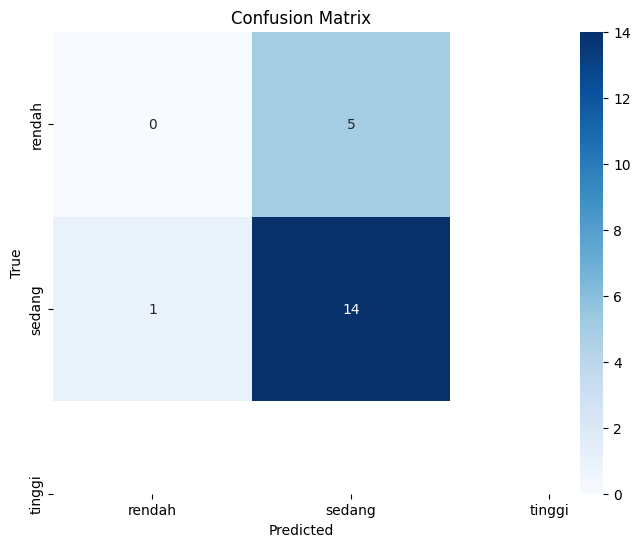

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
# Membuat dan melatih model klasifikasi
classifier_model = DecisionTreeClassifier()
classifier_model.fit(X_class_train, y_class_train)

from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Melakukan prediksi kategori pada data uji
y_class_pred = classifier_model.predict(X_class_test)

# Menghitung precision
precision = precision_score(y_class_test, y_class_pred, average='weighted', zero_division=1)
print(f'Precision: {precision}')

# Menghitung recall
recall = recall_score(y_class_test, y_class_pred, average='weighted', zero_division=1)
print(f'Recall: {recall}')

# Menghitung F1 Score
f1 = f1_score(y_class_test, y_class_pred, average='weighted', zero_division=1)
print(f'F1 Score: {f1}')

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y_class_test, y_class_pred)
print(f'Confusion Matrix:\n{conf_matrix}')
import seaborn as sns
import matplotlib.pyplot as plt



In [ ]:
y_reg_test

73     1547
218    1565
25     1554
208    1635
9      1484
       ... 
220    1448
209    1507
109    1413
93     1546
124    1642
Name: Bilbul, Length: 64, dtype: int64

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Tentukan model
model = DecisionTreeClassifier()

# Tentukan ruang pencarian hyperparameter
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [None, 10, 20, 30],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

# Tentukan metrik evaluasi
scoring = 'accuracy'

# Buat objek GridSearchCV
grid_search = GridSearchCV(model, param_grid, scoring=scoring, cv=5)

# Lakukan pencarian
grid_search.fit(X_class_train, y_class_train)

# Dapatkan hyperparameter terbaik
best_params = grid_search.best_params_

# Dapatkan model terbaik
best_model = grid_search.best_estimator_

# Evaluasi pada data uji
accuracy = best_model.score(X_class_test, y_class_test)
accuracy

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


0.6153846153846154

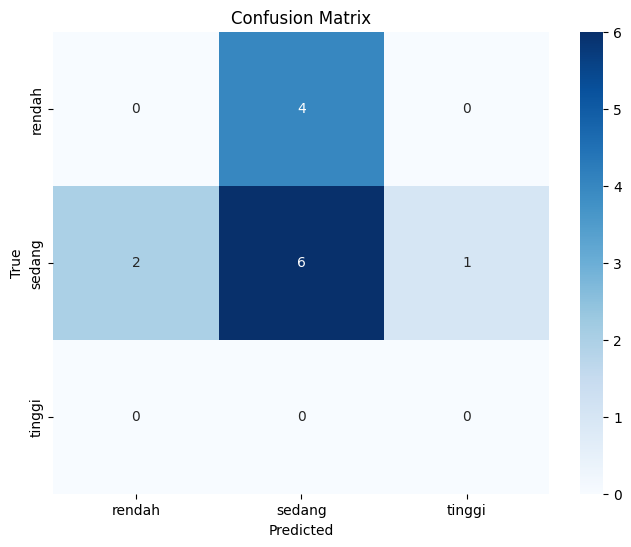

In [ ]:
classifier_model.fit(X_class_train, y_class_train)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat dan melatih model klasifikasi
classifier_model = DecisionTreeClassifier()
classifier_model.fit(X_class_train, y_class_train)

# Lakukan prediksi pada data uji
y_class_pred = classifier_model.predict(X_class_test)

# Hitung confusion matrix
cm = confusion_matrix(y_class_test, y_class_pred)

# Visualisasi confusion matrix menggunakan heatmap
plt.figure(figsize=(8, 6))
labels='rendah', 'sedang', 'tinggi'
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Menghitung metrik-metrik evaluasi
accuracy = (4 + 6) / (4 + 6 + 0 + 3)
precision = 4 / (4 + 0)
recall = 4 / (4 + 2)
specificity = 2 / (2 + 0)
f1_score = 2 * (precision * recall) / (precision + recall)

# Menampilkan hasil
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Specificity: {specificity:.2f}')
print(f'F1 Score: {f1_score:.2f}')


Accuracy: 0.77
Precision: 1.00
Recall: 0.67
Specificity: 1.00
F1 Score: 0.80


In [ ]:
from sklearn.model_selection import cross_val_score
# Membuat dan melatih model klasifikasi
classifier_model = DecisionTreeClassifier()

# Melakukan cross-validation dengan 5 fold
cv_scores = cross_val_score(classifier_model, X_class, y_class, cv=10)

# Menampilkan skor akurasi untuk setiap fold
print("Cross-Validation Scores:", cv_scores)

# Menampilkan rata-rata skor akurasi
print("Average Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.57142857 0.28571429 0.28571429 0.28571429 0.66666667 0.5
 0.5        0.33333333 0.33333333 0.33333333]
Average Accuracy: 0.4095238095238095


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


In [ ]:
# Membuat dan melatih model regresi dengan data yang telah diubah sesuai jumlah data train yang hendak digunakan
regressor_model = DecisionTreeRegressor()
regressor_model.fit(X_reg_train, y_reg_train)

# Melakukan prediksi pada data uji
y_reg_pred = regressor_model.predict(X_reg_test)

# Menggunakan hasil prediksi regresi sebagai fitur untuk klasifikasi
X_class_from_reg = pd.DataFrame({'Prediksi_Regresi': y_reg_pred})

# Menambahkan variabel kategori klasifikasi
X_class_from_reg['Kategori Klasifikasi'] = data['Kategori Klasifikasi']

# Membagi data untuk klasifikasi hanya dengan kolom 'Bilbul'
X_class = X_class_from_reg[['Prediksi_Regresi']]
y_class = X_class_from_reg['Kategori Klasifikasi']

# Membagi data menjadi data latih dan data uji untuk klasifikasi
X_class_train, X_class_test, y_class_train, y_class_test = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Membuat dan melatih model klasifikasi
classifier_model = DecisionTreeClassifier()
classifier_model.fit(X_class_train, y_class_train)

# Memperoleh input pengguna
user_input_reg = get_user_input()

# Menyiapkan data pengguna untuk prediksi regresi
user_data_reg = pd.DataFrame([user_input_reg], columns=['Bul_tinggi', 'Berat Badan', 'Usia', 'Jenis Kelamin'])

# Prediksi jumlah kalori harian dengan model regresi
calories_prediction_reg = predict_calories(regressor_model, user_data_reg)

# Menambahkan hasil prediksi regresi ke data pengguna
user_data_reg['Prediksi_Regresi'] = calories_prediction_reg

# Menyiapkan data pengguna untuk prediksi klasifikasi
user_data_for_classification = user_data_reg[['Prediksi_Regresi']]

# Kategorisasi jumlah kalori harian dengan model klasifikasi
calories_category = categorize_calories(classifier_model, user_data_for_classification)
calories_category
from sklearn.metrics import accuracy_score

# Melakukan prediksi kategori pada data uji
y_class_pred = classifier_model.predict(X_class_test)

# Menghitung akurasi
accuracy = accuracy_score(y_class_test, y_class_pred)
print(f'Akurasi Rekomendasi Menu: {accuracy}')


Masukkan tinggi badan Anda (cm): 160
Masukkan berat badan Anda (kg): 48
Masukkan usia Anda: 19
Masukkan jenis kelamin Anda (0 untuk Male, 1 untuk Female): 1
Akurasi Rekomendasi Menu: 0.38461538461538464


In [ ]:
X_class_test

,Prediksi_Regresi
24,1618.0
13,1599.0
8,2249.0
25,1595.0
4,1907.0
40,1478.0
19,1535.0
39,1619.0
29,1933.0


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import r2_score, accuracy_score
import random

# Ganti angka 1 dan 2 dengan 'Male' dan 'Female'
data['Jenis Kelamin'] = data['Jenis Kelamin'].replace({1: 0, 2: 1})

# Fungsi untuk memprediksi jumlah kalori harian
def predict_calories(regressor_model, user_data):
    prediction = regressor_model.predict(user_data)[0]
    return prediction

# Hitung BMI
def calculate_bmi(berat_badan, tinggi_badan):
    bmi = berat_badan / ((tinggi_badan / 100) * (tinggi_badan / 100))
    return bmi

def classify_bmi(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif 18.5 <= bmi <= 24.99:
        return "Normal"
    elif 25 <= bmi <= 29.99:
        return "Overweight"
    elif 30 <= bmi <= 34.99:
        return "Obesity Level 1"
    elif 35 <= bmi <= 39.99:
        return "Obesity Level 2"
    else:
        return "Obesity Level 3"

# Membagi data menjadi fitur (X) dan target (y) untuk regresi
X_reg = data[['Bul_tinggi', 'Berat Badan', 'Usia', 'Jenis Kelamin']]
y_reg = data['Bilbul']

# Membagi data menjadi data latih dan data uji untuk regresi
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Membuat dan melatih model regresi dengan data yang telah diubah sesuai jumlah data train yang hendak digunakan
regressor_model = DecisionTreeRegressor()
regressor_model.fit(X_reg_train, y_reg_train)

# Melakukan prediksi pada data uji
y_reg_pred = regressor_model.predict(X_reg_test)
Prediksi_Regresi = y_reg_pred
# Menggunakan hasil prediksi regresi sebagai fitur untuk klasifikasi
X_class_from_reg = pd.DataFrame({'Prediksi_Regresi': y_reg_pred})

# Menambahkan variabel kategori klasifikasi
X_class_from_reg['Kategori Klasifikasi'] = data['Kategori Klasifikasi']

# Membaca data untuk klasifikasi (pastikan untuk mengganti 'NamaKolomKlasifikasi' dengan nama kolom yang sesuai)
X_class = X_class_from_reg.drop(columns=['Kategori Klasifikasi'])
y_class = X_class_from_reg['Kategori Klasifikasi']

# Membagi data menjadi data latih dan data uji untuk klasifikasi
X_class_train, X_class_test, y_class_train, y_class_test = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Membuat dan melatih model klasifikasi
classifier_model = DecisionTreeClassifier()
classifier_model.fit(X_class_train, y_class_train)

# Fungsi untuk memperoleh input dari pengguna
def get_user_input():
    tinggi_badan = float(input("Masukkan tinggi badan Anda (cm): "))
    berat_badan = float(input("Masukkan berat badan Anda (kg): "))
    usia = float(input("Masukkan usia Anda: "))
    jenis_kelamin = int(input("Masukkan jenis kelamin Anda (0 untuk Male, 1 untuk Female): "))
    return tinggi_badan, berat_badan, usia, jenis_kelamin

# Fungsi untuk mengkategorikan jumlah kalori harian
def categorize_calories(classifier_model, user_data):
    # Ambil kolom yang digunakan oleh model klasifikasi
    feature_columns = X_class.columns
    # Sesuaikan urutan dan nama kolom dengan fitur yang digunakan pada saat pelatihan model
    user_data_for_classification = user_data[feature_columns]
    # Prediksi kategori dengan model klasifikasi
    category = classifier_model.predict(user_data_for_classification)[0]
    return category

# Memperoleh input pengguna
user_input_reg = get_user_input()

# Menyiapkan data pengguna untuk prediksi regresi
user_data_reg = pd.DataFrame([user_input_reg], columns=['Bul_tinggi', 'Berat Badan', 'Usia', 'Jenis Kelamin'])

# Prediksi jumlah kalori harian dengan model regresi
calories_prediction_reg = predict_calories(regressor_model, user_data_reg)

# Menambahkan hasil prediksi regresi ke data pengguna
user_data_reg['Prediksi_Regresi'] = calories_prediction_reg

# Menyiapkan data pengguna untuk prediksi klasifikasi
user_data_for_classification = user_data_reg[['Prediksi_Regresi', 'Bul_tinggi', 'Berat Badan', 'Usia', 'Jenis Kelamin']]

# Kategorisasi jumlah kalori harian dengan model klasifikasi
calories_category = categorize_calories(classifier_model, user_data_for_classification)

# Mendapatkan nilai BMI dari fungsi calculate_bmi
bmi = calculate_bmi(user_input_reg[1], user_input_reg[0])

# Mendapatkan kategori BMI dari fungsi classify_bmi
bmi_category = classify_bmi(bmi)

# Menampilkan hasil prediksi kalori harian dan rekomendasi menu
print(f"Prediksi Jumlah Kalori Harian Normal: {calories_prediction_reg} kcal")
print(f"Kategori Kebutuhan Kalori: {calories_category}")
print(f"Indeks Massa Tubuh (BMI): {bmi:.2f}")
print(f"Klasifikasi BMI: {bmi_category}")

# Membaca data menu
menu_data = data[['Menu', 'Kategori']]

# Fungsi untuk memberikan rekomendasi menu acak dari kategori
def recommend_random_menu(calories_category, menu_data):
    recommended_menu = menu_data[menu_data['Kategori'] == calories_category]
    if not recommended_menu.empty:
        random_menu = recommended_menu.sample(n=1)
        return random_menu
    else:
        return None

# Menghitung R-squared
r_squared = r2_score(y_reg_test, y_reg_pred)
print(f'Akurasi Prediksi Jumlah Kalori Harian: {r_squared}')

# Melakukan prediksi kategori pada data uji
y_class_pred = classifier_model.predict(X_class_test)

# Menghitung akurasi
accuracy = accuracy_score(y_class_test, y_class_pred)
print(f'Akurasi Rekomendasi Menu: {accuracy}')

# Rekomendasi menu acak berdasarkan kategori
recommended_menu = recommend_random_menu(calories_category, menu_data)

# Menampilkan hasil rekomendasi menu
print("Rekomendasi Menu:")
print(recommended_menu)


Masukkan tinggi badan Anda (cm): 160
Masukkan berat badan Anda (kg): 48
Masukkan usia Anda: 19
Masukkan jenis kelamin Anda (0 untuk Male, 1 untuk Female): 1
Prediksi Jumlah Kalori Harian Normal: 1642.0 kcal
Kategori Kebutuhan Kalori: Sedang
Indeks Massa Tubuh (BMI): 18.75
Klasifikasi BMI: Normal
Akurasi Prediksi Jumlah Kalori Harian: 0.9717104336428338
Akurasi Rekomendasi Menu: 0.6666666666666666
Rekomendasi Menu:
                                                 Menu Kategori
16  [Sarapan: 1 piece of Mandarine Orange +  Peach...   Sedang


In [ ]:
# Periksa nama fitur dari dataset
print("Feature Names in Dataset:", user_data_for_classification.columns)


Feature Names in Dataset: Index(['Prediksi_Regresi', 'Bul_tinggi', 'Berat Badan', 'Usia',
       'Jenis Kelamin'],
      dtype='object')


In [ ]:
print("Feature Names in Model:", classifier_model.feature_names_in_)


Feature Names in Model: ['Prediksi_Regresi']


In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, export_graphviz
import graphviz
from google.colab import files

# Create a decision tree regressor model
model = DecisionTreeRegressor()

# Fit the model to the training data
model.fit(X_reg_train, y_reg_train)

# Get text representation of the decision tree
tree_rules = export_graphviz(model, feature_names=list(X_reg_train.columns))
print(tree_rules)

# Export the decision tree to a Graphviz file
dot_data = export_graphviz(model, out_file=None,
                           feature_names=list(X_reg_train.columns),
                           filled=True, rounded=True, special_characters=True)

# Visualize the decision tree
graph = graphviz.Source(dot_data)
graph.render("decision_tree", format="pdf", cleanup=True, directory=".")

# Download the PDF file
files.download("/content/decision_tree.pdf")


digraph Tree {
node [shape=box, fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="Berat Badan <= 73.5\nsquared_error = 60417.936\nsamples = 161\nvalue = 1714.627"] ;
1 [label="Berat Badan <= 53.5\nsquared_error = 8559.361\nsamples = 111\nvalue = 1570.577"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="Bul_tinggi <= 120.0\nsquared_error = 4226.196\nsamples = 75\nvalue = 1529.52"] ;
1 -> 2 ;
3 [label="squared_error = 0.0\nsamples = 1\nvalue = 1223.0"] ;
2 -> 3 ;
4 [label="Usia <= 36.5\nsquared_error = 2996.494\nsamples = 74\nvalue = 1533.662"] ;
2 -> 4 ;
5 [label="Berat Badan <= 47.5\nsquared_error = 2257.45\nsamples = 60\nvalue = 1547.683"] ;
4 -> 5 ;
6 [label="Berat Badan <= 41.5\nsquared_error = 890.681\nsamples = 31\nvalue = 1517.355"] ;
5 -> 6 ;
7 [label="Berat Badan <= 38.5\nsquared_error = 592.776\nsamples = 7\nvalue = 1478.286"] ;
6 -> 7 ;
8 [label="Usia <= 14.5\nsquared_error = 72.25\nsamples = 2\nvalue = 1445.5"] ;
7 -> 8 ;
9 [label="sq

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from google.colab import files

# Create a decision tree regressor model
model = DecisionTreeClassifier()

# Fit the model to the training data
model.fit(X_class_train, y_class_train)

# Get text representation of the decision tree
tree_rules = export_graphviz(model, feature_names=list(X_class_train.columns))
print(tree_rules)

# Export the decision tree to a Graphviz file
dot_data = export_graphviz(model, out_file=None,
                           feature_names=list(X_class_train.columns),
                           filled=True, rounded=True, special_characters=True)

# Visualize the decision tree
graph = graphviz.Source(dot_data)
graph.render("decision_tree_class", format="pdf", cleanup=True, directory=".")


digraph Tree {
node [shape=box, fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="Berat Badan <= 92.5\ngini = 0.447\nsamples = 161\nvalue = [18, 115, 28]"] ;
1 [label="Berat Badan <= 41.5\ngini = 0.274\nsamples = 132\nvalue = [18, 111, 3]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="Bul_tinggi <= 141.5\ngini = 0.375\nsamples = 8\nvalue = [6, 2, 0]"] ;
1 -> 2 ;
3 [label="gini = 0.0\nsamples = 6\nvalue = [6, 0, 0]"] ;
2 -> 3 ;
4 [label="gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]"] ;
2 -> 4 ;
5 [label="Usia <= 36.5\ngini = 0.217\nsamples = 124\nvalue = [12, 109, 3]"] ;
1 -> 5 ;
6 [label="Berat Badan <= 88.0\ngini = 0.048\nsamples = 81\nvalue = [1, 79, 1]"] ;
5 -> 6 ;
7 [label="Usia <= 33.5\ngini = 0.025\nsamples = 80\nvalue = [1, 79, 0]"] ;
6 -> 7 ;
8 [label="gini = 0.0\nsamples = 73\nvalue = [0, 73, 0]"] ;
7 -> 8 ;
9 [label="Berat Badan <= 48.0\ngini = 0.245\nsamples = 7\nvalue = [1, 6, 0]"] ;
7 -> 9 ;
10 [label="gini = 0.0\nsamples = 1\nvalue

'decision_tree_class.pdf'

In [ ]:
# Download the PDF file
files.download("/content/decision_tree_class.pdf")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Misalnya, simpul tertentu pada kedalaman tertentu, di sini saya asumsikan kedalaman 1
model = DecisionTreeClassifier()
node_at_depth_1 = model.tree_.children_left[0]  # Ganti dengan indeks simpul yang sesuai
class_distribution = model.tree_.value[node_at_depth_1]

# Jika menggunakan DecisionTreeClassifier
print("Class Distribution:", class_distribution)


AttributeError: ignored